<a href="https://colab.research.google.com/github/riddhi-speaks/Event-Based-Stock-Price-Prediction-using-Sentiment-Analysis-NLP/blob/main/Stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Loading datasets

In [ ]:
Stock=pd.read_csv('/content/BSESN1.csv')

In [ ]:
Stock.shape

(249, 7)

<Axes: xlabel='None', ylabel='Close'>

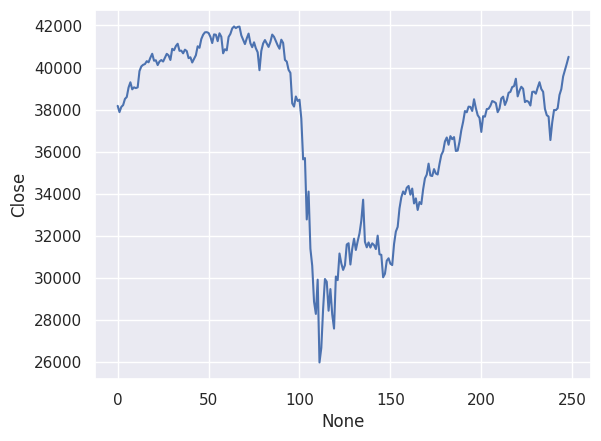

In [ ]:
sns.lineplot(x=Stock.index, y=Stock.Close)

In [ ]:
news=pd.read_csv('/content/india-news-headlines.csv')


In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
news=news.head(6000)
news

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
5995,20010624,home.science,All-faith convention vows to save girl child
5996,20010624,business.international-business,Satellite's corrupt cops still on the run
5997,20010624,unknown,Musharraf has packed schedule during India visit
5998,20010624,india,One held in murder of Bangladeshi scribe


Data Cleaning

In [ ]:
news.drop('publish_date', axis=1, inplace=True)

In [ ]:
news.isna().sum()

headline_category    0
headline_text        0
dtype: int64

In [ ]:
news=news.dropna()
news.duplicated().sum()

899

In [ ]:
news=news.drop_duplicates()
news

,headline_category,headline_text
0,unknown,Status quo will not be disturbed at Ayodhya; s...
1,unknown,Fissures in Hurriyat over Pak visit
2,unknown,America's unwanted heading for India?
3,unknown,For bigwigs; it is destination Goa
4,unknown,Extra buses to clear tourist traffic
...,...,...
5995,home.science,All-faith convention vows to save girl child
5996,business.international-business,Satellite's corrupt cops still on the run
5997,unknown,Musharraf has packed schedule during India visit
5998,india,One held in murder of Bangladeshi scribe


<ipython-input-16-05ac55ce8ddb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(y=news['headline_category'],palette="Set3")


Text(0.5, 0, 'COUNTS')

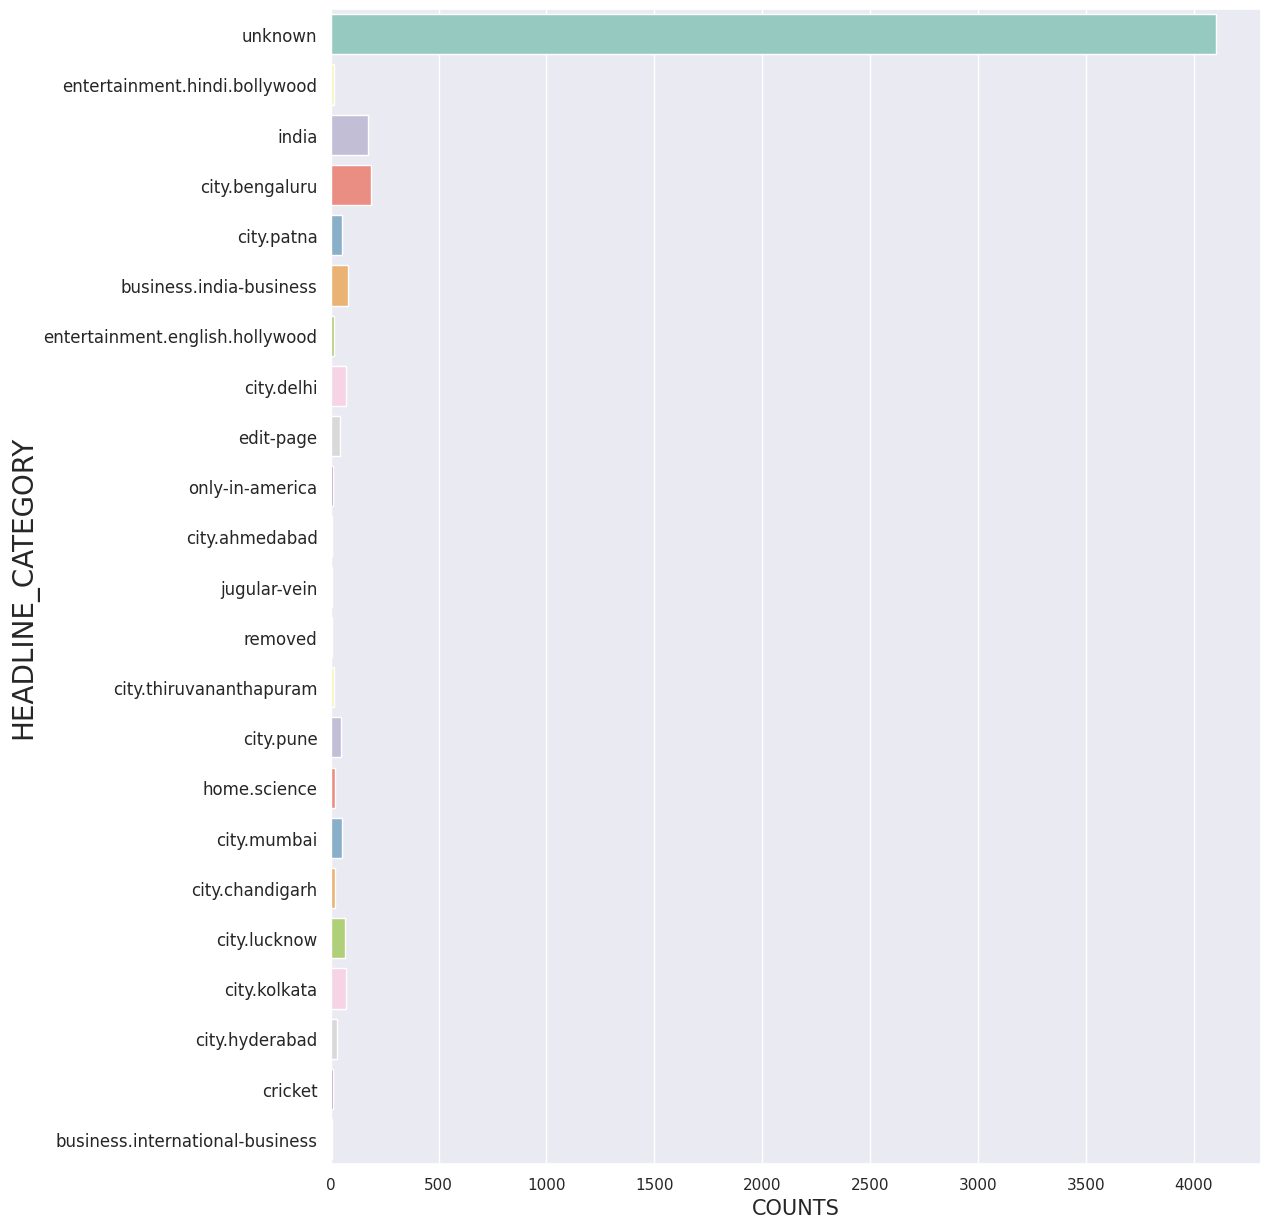

In [ ]:
plt.figure(figsize=(12,15))
ax=sns.countplot(y=news['headline_category'],palette="Set3")
plt.yticks(fontsize=12);
plt.ylabel('HEADLINE_CATEGORY', fontsize=20)
plt.xlabel('COUNTS',fontsize=15)

<ipython-input-17-5447a74a8a38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(y=news1['headline_category'],palette="Set3")


Text(0.5, 0, 'COUNTS')

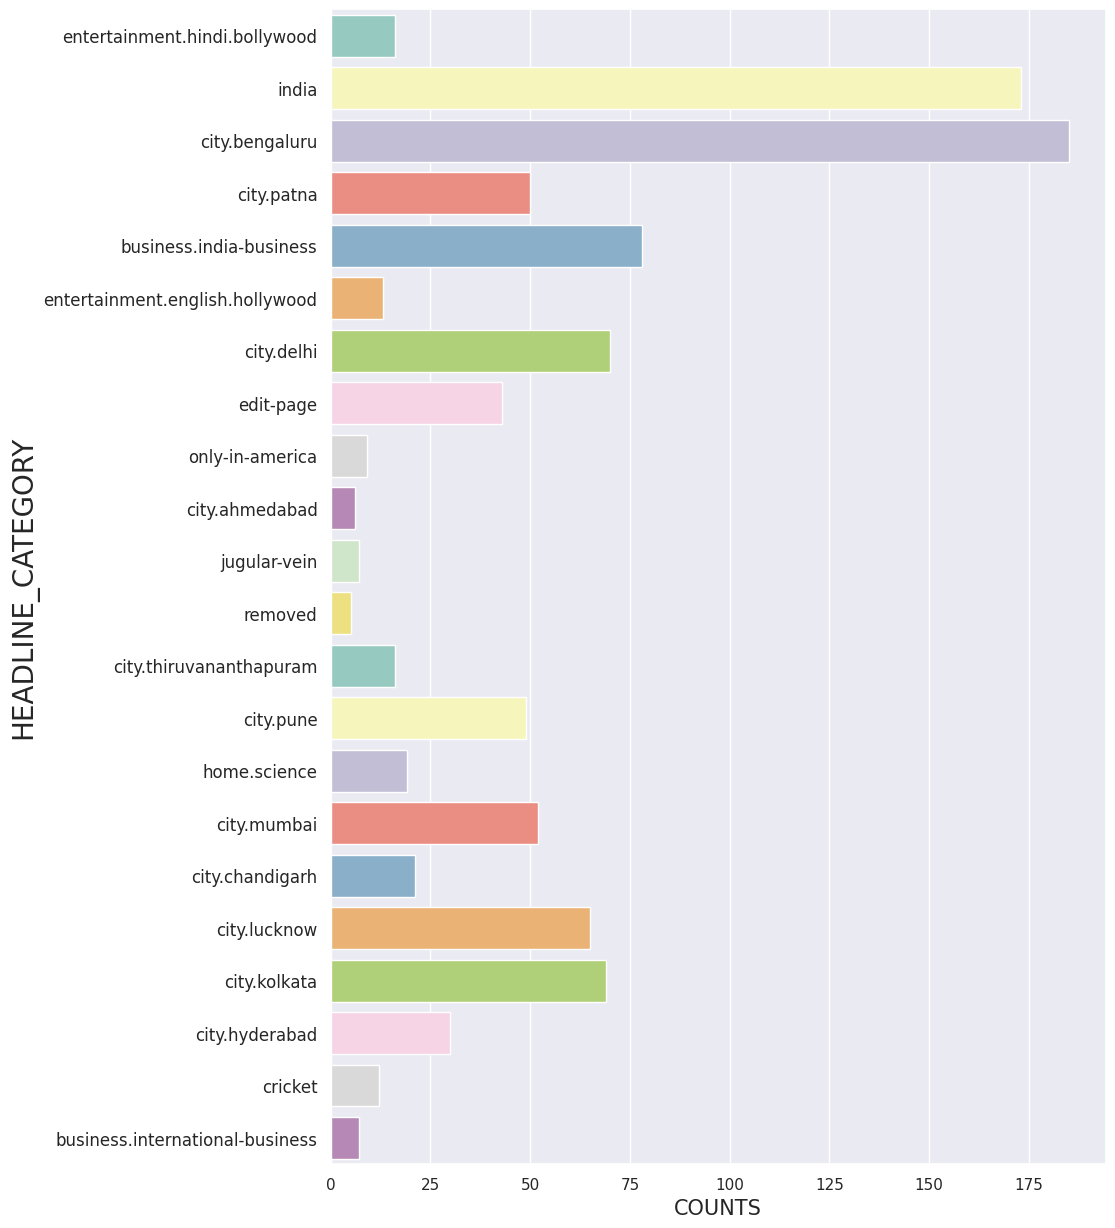

In [ ]:
plt.figure(figsize=(10,15))
news1=news[news['headline_category']!='unknown']
ax=sns.countplot(y=news1['headline_category'],palette="Set3")
plt.yticks(fontsize=12);
plt.ylabel('HEADLINE_CATEGORY', fontsize=20)
plt.xlabel('COUNTS',fontsize=15)

Counting characters

In [ ]:
news['char_count'] = news['headline_text'].str.len()
news[['headline_text', 'char_count']].head()

,headline_text,char_count
0,Status quo will not be disturbed at Ayodhya; s...,58
1,Fissures in Hurriyat over Pak visit,35
2,America's unwanted heading for India?,37
3,For bigwigs; it is destination Goa,34
4,Extra buses to clear tourist traffic,36


Counting words

In [ ]:
news['word_count'] = news['headline_text'].apply(lambda x: len(str(x).split(" ")))
news[['headline_text','word_count']].head()

,headline_text,word_count
0,Status quo will not be disturbed at Ayodhya; s...,10
1,Fissures in Hurriyat over Pak visit,6
2,America's unwanted heading for India?,5
3,For bigwigs; it is destination Goa,6
4,Extra buses to clear tourist traffic,6



Seeing average word length

In [ ]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

news['avg_word'] = news['headline_text'].apply(lambda x: avg_word(x))
news[['headline_text','avg_word']]

,headline_text,avg_word
0,Status quo will not be disturbed at Ayodhya; s...,4.900000
1,Fissures in Hurriyat over Pak visit,5.000000
2,America's unwanted heading for India?,6.600000
3,For bigwigs; it is destination Goa,4.833333
4,Extra buses to clear tourist traffic,5.166667
...,...,...
5995,All-faith convention vows to save girl child,5.428571
5996,Satellite's corrupt cops still on the run,5.000000
5997,Musharraf has packed schedule during India visit,6.000000
5998,One held in murder of Bangladeshi scribe,4.857143


In [ ]:
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Calculating Stopwords

In [ ]:
stop = stopwords.words('english')

news['stopwords'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
news[['headline_text','stopwords']].head()

,headline_text,stopwords
0,Status quo will not be disturbed at Ayodhya; s...,4
1,Fissures in Hurriyat over Pak visit,2
2,America's unwanted heading for India?,1
3,For bigwigs; it is destination Goa,2
4,Extra buses to clear tourist traffic,1


Number of Special characters in each statements

In [ ]:
news['hastags'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
news[['headline_text','hastags']].head()

,headline_text,hastags
0,Status quo will not be disturbed at Ayodhya; s...,0
1,Fissures in Hurriyat over Pak visit,0
2,America's unwanted heading for India?,0
3,For bigwigs; it is destination Goa,0
4,Extra buses to clear tourist traffic,0


Number of numerics in each statements

In [ ]:
news['numerics'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
news[['headline_text','numerics']].head()

,headline_text,numerics
0,Status quo will not be disturbed at Ayodhya; s...,0
1,Fissures in Hurriyat over Pak visit,0
2,America's unwanted heading for India?,0
3,For bigwigs; it is destination Goa,0
4,Extra buses to clear tourist traffic,0


In [ ]:
news['upper'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
news[['headline_text','upper']].head()

,headline_text,upper
0,Status quo will not be disturbed at Ayodhya; s...,0
1,Fissures in Hurriyat over Pak visit,0
2,America's unwanted heading for India?,0
3,For bigwigs; it is destination Goa,0
4,Extra buses to clear tourist traffic,0


Uppercase words

In [ ]:
news['headline_text'] = news['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
news['headline_text'].head()

0    status quo will not be disturbed at ayodhya; s...
1                  fissures in hurriyat over pak visit
2                america's unwanted heading for india?
3                   for bigwigs; it is destination goa
4                 extra buses to clear tourist traffic
Name: headline_text, dtype: object


Removing punctuations

In [ ]:
news['headline_text'] = news['headline_text'].str.replace('[^\w\s]','')
news['headline_text'].head()

0    status quo will not be disturbed at ayodhya; s...
1                  fissures in hurriyat over pak visit
2                america's unwanted heading for india?
3                   for bigwigs; it is destination goa
4                 extra buses to clear tourist traffic
Name: headline_text, dtype: object

Removing Stopwords

In [ ]:
stop = stopwords.words('english')
news['headline_text'] = news['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
news['headline_text'].head()

0    status quo disturbed ayodhya; says vajpayee
1                    fissures hurriyat pak visit
2              america's unwanted heading india?
3                       bigwigs; destination goa
4              extra buses clear tourist traffic
Name: headline_text, dtype: object

In [ ]:
freq = pd.Series(' '.join(news['headline_text']).split()).value_counts()[:10]
freq

govt      162
india     111
new       100
may        69
police     63
cong       62
cm         61
get        60
says       59
bjp        57
Name: count, dtype: int64

In [ ]:
freq = pd.Series(' '.join(news['headline_text']).split()).value_counts()[-10:]
freq

sharifs        1
desecration    1
halt           1
missiles       1
short-range    1
10th           1
parrikar's     1
prominence     1
artisans       1
amitabh's      1
Name: count, dtype: int64

In [ ]:
news['headline_text'].apply(lambda x: str(TextBlob(x).correct()))

0       status que disturbed ayodhya; says vajpayee
1                       fissures hurriyat pay visit
2                 america's unwanted heading india?
3                           bigwigs; destination go
4                extra bushes clear tourist traffic
                           ...                     
5995      all-faith convention vows save girl child
5996            satellite's corrupt corps still run
5997          musharraf packed schedule india visit
5998            one held murder bangladeshi ascribe
5999                    amitabh's face son abhishek
Name: headline_text, Length: 5101, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenization

In [ ]:
TextBlob(str(news['headline_text'])).words

WordList(['0', 'status', 'quo', 'disturbed', 'ayodhya', 'says', 'vajpayee', '1', 'fissures', 'hurriyat', 'pak', 'visit', '2', 'america', "'s", 'unwanted', 'heading', 'india', '3', 'bigwigs', 'destination', 'goa', '4', 'extra', 'buses', 'clear', 'tourist', 'traffic', '5995', 'all-faith', 'convention', 'vows', 'save', 'girl', 'child', '5996', 'satellite', "'s", 'corrupt', 'cops', 'still', 'run', '5997', 'musharraf', 'packed', 'schedule', 'india', 'visit', '5998', 'one', 'held', 'murder', 'bangladeshi', 'scribe', '5999', 'amitabh', "'s", 'face', 'son', 'abhishek', 'Name', 'headline_text', 'Length', '5101', 'dtype', 'object'])

Stemming

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
news['headline_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       statu quo disturb ayodhya; say vajpaye
1                    fissur hurriyat pak visit
2                  america' unwant head india?
3                          bigwigs; destin goa
4             extra buse clear tourist traffic
                         ...                  
5995     all-faith convent vow save girl child
5996          satellite' corrupt cop still run
5997        musharraf pack schedul india visit
5998        one held murder bangladeshi scribe
5999                amitabh' face son abhishek
Name: headline_text, Length: 5101, dtype: object

Trigram

In [ ]:
T3=TextBlob(str(news['headline_text'][1:])).ngrams(3)
T3[:30]

[WordList(['1', 'fissures', 'hurriyat']),
 WordList(['fissures', 'hurriyat', 'pak']),
 WordList(['hurriyat', 'pak', 'visit']),
 WordList(['pak', 'visit', '2']),
 WordList(['visit', '2', 'america']),
 WordList(['2', 'america', "'s"]),
 WordList(['america', "'s", 'unwanted']),
 WordList(["'s", 'unwanted', 'heading']),
 WordList(['unwanted', 'heading', 'india']),
 WordList(['heading', 'india', '3']),
 WordList(['india', '3', 'bigwigs']),
 WordList(['3', 'bigwigs', 'destination']),
 WordList(['bigwigs', 'destination', 'goa']),
 WordList(['destination', 'goa', '4']),
 WordList(['goa', '4', 'extra']),
 WordList(['4', 'extra', 'buses']),
 WordList(['extra', 'buses', 'clear']),
 WordList(['buses', 'clear', 'tourist']),
 WordList(['clear', 'tourist', 'traffic']),
 WordList(['tourist', 'traffic', '5']),
 WordList(['traffic', '5', 'dilute']),
 WordList(['5', 'dilute', 'power']),
 WordList(['dilute', 'power', 'transfers']),
 WordList(['power', 'transfers', 'says']),
 WordList(['transfers', 'says',

Term frequency

In [ ]:
tf = (news['headline_text'][1:]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']
tf

,words,tf
0,fissures,2.0
1,hurriyat,11.0
2,pak,21.0
3,visit,20.0
4,america's,1.0
...,...,...
9849,56;,1.0
9850,rebels,1.0
9851,all-faith,1.0
9852,satellite's,1.0


In [ ]:
tf['tfidf'] = tf['tf'] * tf['idf']
tf

,words,tf,idf,tfidf
0,fissures,2.0,6.209596,12.419191
1,hurriyat,11.0,4.504847,49.553322
2,pak,21.0,3.052595,64.104498
3,visit,20.0,3.501545,70.030907
4,america's,1.0,6.902743,6.902743
...,...,...,...,...
9849,56;,1.0,NaN,NaN
9850,rebels,1.0,NaN,NaN
9851,all-faith,1.0,NaN,NaN
9852,satellite's,1.0,NaN,NaN


Performing Sentimental analysis

In [ ]:
news['headline_text'][1:].apply(lambda x: TextBlob(x).sentiment)

1                                       (0.0, 0.0)
2                                       (0.0, 0.0)
3                                       (0.0, 0.0)
4       (0.05000000000000001, 0.24166666666666664)
5                                       (0.0, 0.0)
                           ...                    
5995                                    (0.0, 0.0)
5996                                   (-0.5, 1.0)
5997                                    (0.0, 0.0)
5998                                    (0.0, 0.0)
5999                                    (0.0, 0.0)
Name: headline_text, Length: 5100, dtype: object

Assigning polarity

In [ ]:
news['sentiment'] = news['headline_text'].apply(lambda x: TextBlob(x).sentiment[0] )
news[['headline_text','sentiment']].head()

,headline_text,sentiment
0,status quo disturbed ayodhya; says vajpayee,0.00
1,fissures hurriyat pak visit,0.00
2,america's unwanted heading india?,0.00
3,bigwigs; destination goa,0.00
4,extra buses clear tourist traffic,0.05


In [ ]:
x1=news[news['sentiment']>=0.5]
x2=news[news['sentiment']<0.5]
news['sentiment']=news['sentiment'].astype(float)
news.sentiment[news.sentiment>0]=1
news.sentiment[news.sentiment<0]=-1;
merge_data=pd.merge(news,Stock, left_index=True, right_index=True)
merge_data

<ipython-input-46-40529de4b979>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news.sentiment[news.sentiment>0]=1
<ipython-input-46-40529de4b979>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news.sentiment[news.sentiment<0]=-1;


,headline_category,headline_text,char_count,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,unknown,status quo disturbed ayodhya; says vajpayee,58,10,4.900000,4,0,0,0,0.0,09-10-2019,37628.05078,38209.83984,37415.82813,38177.94922,38177.94922,36400
1,unknown,fissures hurriyat pak visit,35,6,5.000000,2,0,0,0,0.0,10-10-2019,38130.23047,38130.23047,37802.92969,37880.39844,37880.39844,27300
2,unknown,america's unwanted heading india?,37,5,6.600000,1,0,0,0,0.0,11-10-2019,37994.48047,38345.41016,37737.85156,38127.07813,38127.07813,39400
3,unknown,bigwigs; destination goa,34,6,4.833333,2,0,0,0,0.0,14-10-2019,38208.23828,38513.69141,38066.12891,38214.46875,38214.46875,28500
4,unknown,extra buses clear tourist traffic,36,6,5.166667,1,0,0,0,1.0,15-10-2019,38316.48828,38635.19141,38238.26953,38506.08984,38506.08984,26200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,unknown,experts discuss horticulture development,40,4,9.250000,0,0,0,0,0.0,05-10-2020,38956.78125,39263.85156,38819.89063,38973.69922,38973.69922,15500
245,unknown,5 acquitted trespassing case,31,5,5.400000,1,0,1,0,0.0,06-10-2020,39336.33984,39623.76172,39191.10156,39574.57031,39574.57031,11300
246,unknown,development horticulture stressed,36,4,8.250000,1,0,0,0,0.0,07-10-2020,39633.19141,39968.03906,39450.82031,39878.94922,39878.94922,15000
247,unknown,new office-bearers icsi,27,4,6.000000,1,0,0,1,1.0,08-10-2020,40204.32031,40468.87891,40062.23047,40182.67188,40182.67188,14400


<ipython-input-47-eb7eb7ff56ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(news['sentiment'],palette='Set3')
<ipython-input-47-eb7eb7ff56ba>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


[Text(0, 0, 'Negative'),
 Text(1, 0, 'Neutral'),
 Text(2, 0, 'Positive'),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''

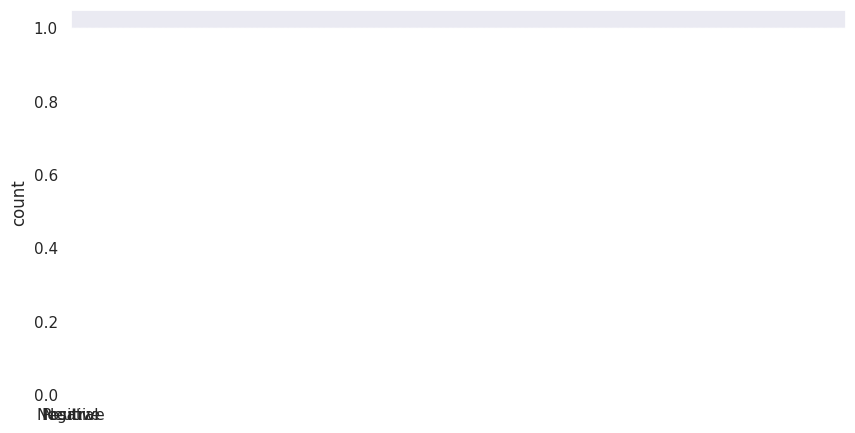

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(news['sentiment'],palette='Set3')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

Here we can see that there are much more neutral sentiments followed by positive and negative sentiments based on the their polarity acquired from above techniques

In [ ]:
X=merge_data.iloc[:,[2,3,4,5,6,7,9,11,12,13,14,15,16]].values
y=merge_data['sentiment']
y.value_counts()

sentiment
 0.0    141
 1.0     23
-1.0      8
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=45)
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=3,class_weight='balanced')
svclassifier.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='poly')

PREDICTING SENTIMENTS(POSITIVE(1),NEUTRAL(0),NEGETIVE(-1))

In [ ]:
y_pred = svclassifier.predict(X_test)
y_pred

array([-1.,  0.,  1.,  1., -1.,  0.,  1., -1., -1.,  1.,  1., -1.,  0.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  0.,  1.,  0.,  1.])

Confusion metrice for model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  1  1]
 [ 9  3 16]
 [ 0  1  4]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         0.0       0.60      0.11      0.18        28
         1.0       0.19      0.80      0.31         5

    accuracy                           0.20        35
   macro avg       0.26      0.30      0.16        35
weighted avg       0.51      0.20      0.19        35

